## 1) Data Collection

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('USdisaster.csv')
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


In [3]:
df.shape

(62771, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62771 entries, 0 to 62770
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     62771 non-null  object
 1   disaster_number             62771 non-null  int64 
 2   state                       62771 non-null  object
 3   declaration_type            62771 non-null  object
 4   declaration_date            62771 non-null  object
 5   fy_declared                 62771 non-null  int64 
 6   incident_type               62771 non-null  object
 7   declaration_title           62771 non-null  object
 8   ih_program_declared         62771 non-null  int64 
 9   ia_program_declared         62771 non-null  int64 
 10  pa_program_declared         62771 non-null  int64 
 11  hm_program_declared         62771 non-null  int64 
 12  incident_begin_date         62771 non-null  object
 13  incident_end_date           54433 non-null  ob

## 2) Exploratory Data Analysis

In [5]:
df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000
mean,2540.282503,2003.958452,0.168470,0.273805,0.930828,0.426566,31711.800577,96348.959854,35295.169824
std,1394.657070,14.703548,0.374286,0.445914,0.253749,0.494582,16539.960239,14036.315551,35272.190599
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1293.000000,1996.000000,0.000000,0.000000,1.000000,0.000000,20000.000000,99029.000000,8135.000000
50%,3033.000000,2006.000000,0.000000,0.000000,1.000000,0.000000,30037.000000,99073.000000,19106.000000
75%,3482.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,46079.000000,99125.000000,74060.000000
max,5423.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


### 1) Univariate Analysis

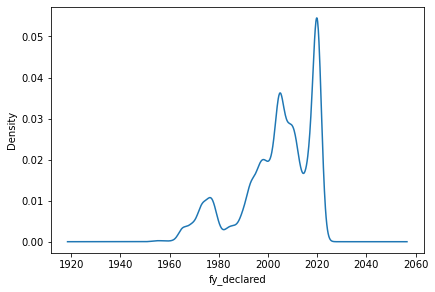

In [18]:
# Perform Univariate Analysis using Density plot
df['fy_declared'].plot.kde()
plt.xlabel('fy_declared')
plt.tight_layout(pad=0.5)

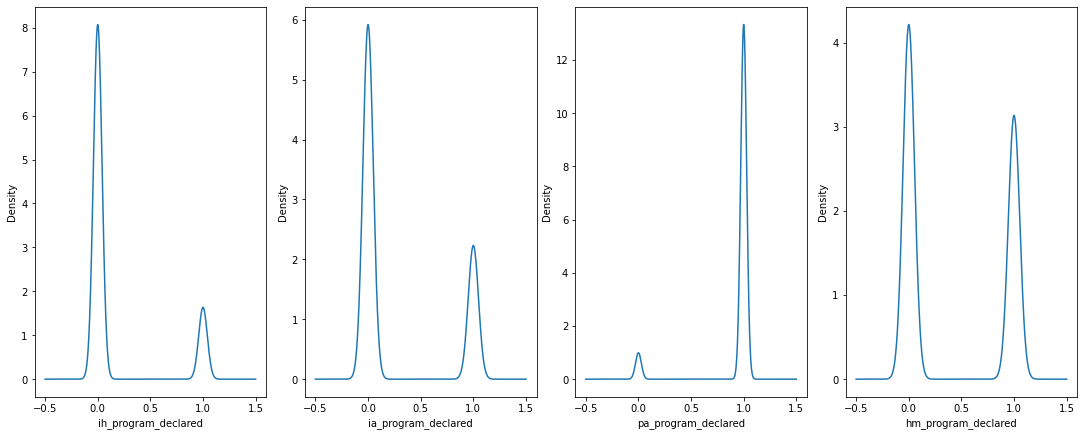

In [17]:
# Perform Univariate Analysis using Density plot
plt.subplot(141)
df['ih_program_declared'].plot.kde(figsize=(15,6))
plt.xlabel('ih_program_declared')
plt.tight_layout(pad=0.5)

plt.subplot(142)
df['ia_program_declared'].plot.kde()
plt.xlabel('ia_program_declared')
plt.tight_layout(pad=0.5)

plt.subplot(143)
df['pa_program_declared'].plot.kde()
plt.xlabel('pa_program_declared')
plt.tight_layout(pad=0.5)

plt.subplot(144)
df['hm_program_declared'].plot.kde()
plt.xlabel('hm_program_declared')
plt.tight_layout(pad=0.5)

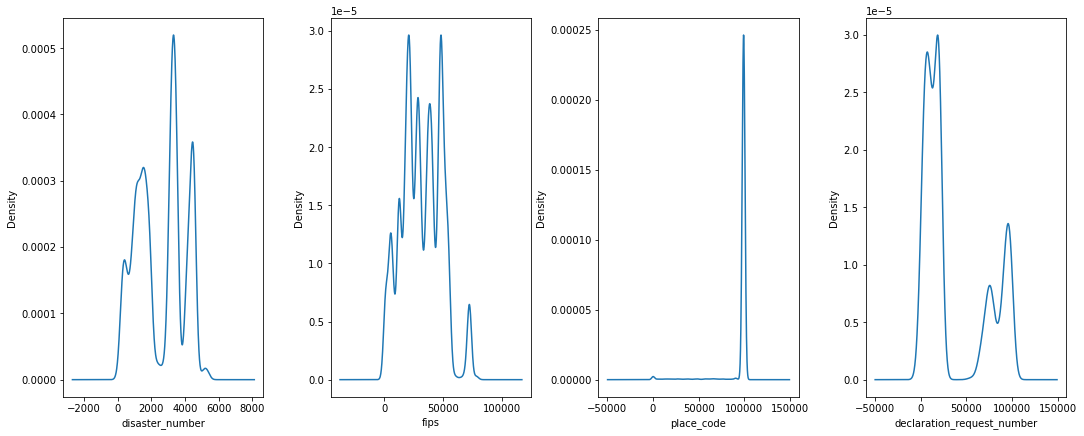

In [8]:
# Perform Univariate Analysis using Density plot
plt.subplot(141)
df['disaster_number'].plot.kde(figsize=(15,6))
plt.xlabel("disaster_number")
plt.tight_layout(pad=0.5)

plt.subplot(142)
df['fips'].plot.kde()
plt.xlabel("fips")
plt.tight_layout(pad=0.5)

plt.subplot(143)
df['place_code'].plot.kde()
plt.xlabel("place_code")
plt.tight_layout(pad=0.5)

plt.subplot(144)
df['declaration_request_number'].plot.kde()
plt.xlabel("declaration_request_number")
plt.tight_layout(pad=0.5)

### 2) Bivariate Analysis

In [19]:
df.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'hash', 'last_refresh',
       'id'],
      dtype='object')

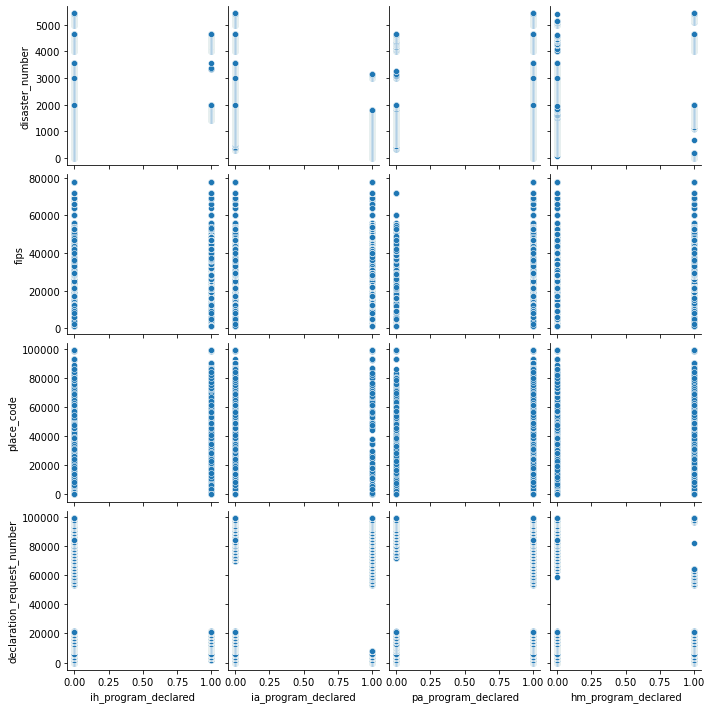

In [20]:
# Perform Bivariate Analysis using pairplot
sns.pairplot(
    df,
    x_vars=['ih_program_declared','ia_program_declared','pa_program_declared','hm_program_declared'],
    y_vars=['disaster_number','fips', 'place_code','declaration_request_number'],
)

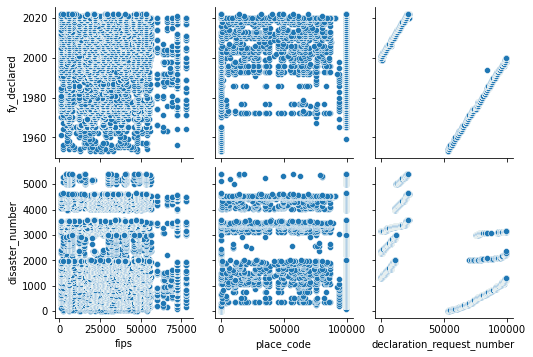

In [21]:
# Perform Bivariate Analysis using pairplot
sns.pairplot(
    df,
    x_vars=['fips', 'place_code','declaration_request_number'],
    y_vars=['fy_declared','disaster_number',],
    
)

### 3) Multivariate Analysis

<AxesSubplot:>

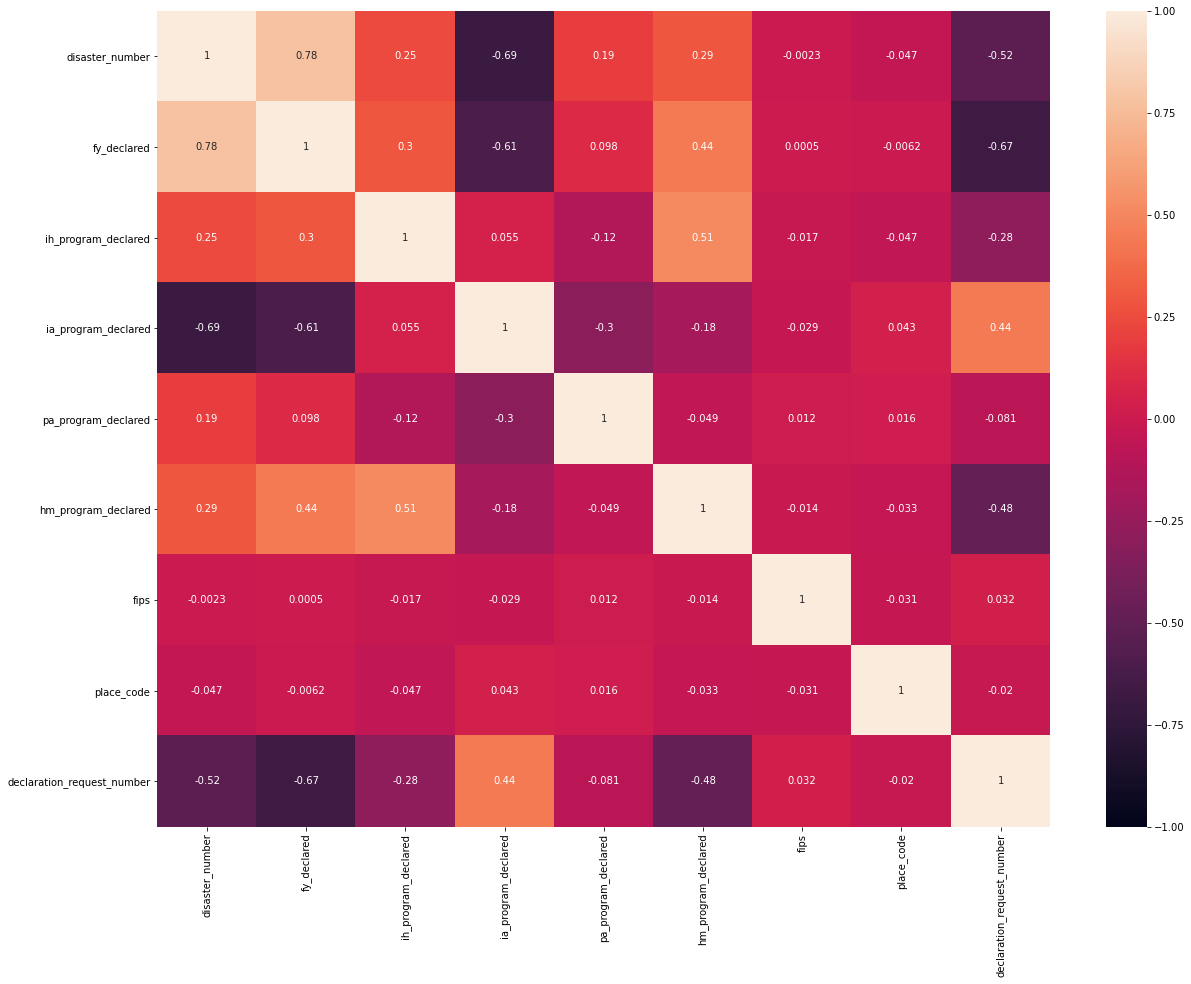

In [24]:
# Find the correlation and display the heatmap to show the correlation visually
corr_matrix=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True)